<a href="https://colab.research.google.com/github/FaisalAhmedBijoy/Tensorflow-for-Deep-Learning-Udacity/blob/main/Drive_Transfer_learning_ResNet_152v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

'\nimport plaidml.keras\nplaidml.keras.install_backend()\nos.environ["KERAS_BACKEND"] = "plaidml.keras.backend"\n'

In [2]:
print('Current working directory: ',os.getcwd())

Current working directory:  /content


## Dataset path location using glob

In [ ]:
'''
building_house=glob.glob('dataset_building/building_house/*.*')
mosque=glob.glob('dataset_building/mosque/*.*')
temple=glob.glob('dataset_building/temple/*.*')
tinshed=glob.glob('dataset_building/tinshed/*.*')
sky_building=glob.glob('dataset_building/sky_building/*.*')
mud_house=glob.glob('dataset_building/mud_house/*.*')
'''

"\nbuilding_house=glob.glob('dataset_building/building_house/*.*')\nmosque=glob.glob('dataset_building/mosque/*.*')\ntemple=glob.glob('dataset_building/temple/*.*')\ntinshed=glob.glob('dataset_building/tinshed/*.*')\nsky_building=glob.glob('dataset_building/sky_building/*.*')\nmud_house=glob.glob('dataset_building/mud_house/*.*')\n"

In [ ]:
'''
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))
print('Sky building data: ',len(sky_building))
print('Mud house data: ',len(mud_house))
'''

"\nprint('Building house data : ',len(building_house))\nprint('Mosque data: ',len(mosque))\nprint('Temple data: ',len(temple))\nprint('Tinshed data: ',len(tinshed))\nprint('Sky building data: ',len(sky_building))\nprint('Mud house data: ',len(mud_house))\n"

In [ ]:
'''
dataset_classes=[building_house,mosque,temple,tinshed,sky_building,mud_house]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)
'''

"\ndataset_classes=[building_house,mosque,temple,tinshed,sky_building,mud_house]\ntotal_class=len(dataset_classes)\nprint('Total dataset class: ',total_class)\n"

## Access Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
train_path='/content/drive/My Drive/CSE 4000 Thesis (old)/Dataset1500/train'
test_path='/content/drive/My Drive/CSE 4000 Thesis (old)/Dataset1500/test'

In [12]:
print(os.listdir(train_path))
print(os.listdir(test_path))

['building_house', 'mosque', 'temple', 'tinshed', 'mud_house', 'sky_building']
['mud_house', 'building_house', 'mosque', 'sky_building', 'temple', 'tinshed']


## Dataset Preprocessing using ImageDataGenerator

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
WIDTH=224
HEIGHT=224

In [13]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip=True,
                                    shear_range=0.1 ,
                                    zoom_range=0.1,
                                    rotation_range=20,
                                    height_shift_range=0.1,
                                    fill_mode='nearest',
                                    validation_split=0.2)
                                     
train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical',
                                                 subset='training')

validation_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical',
                                                 subset='validation')

Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [14]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(batch_size=32,
                                                 directory=test_path,
                                                 shuffle=False,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 300 images belonging to 6 classes.


In [ ]:
train_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [ ]:
validation_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [19]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

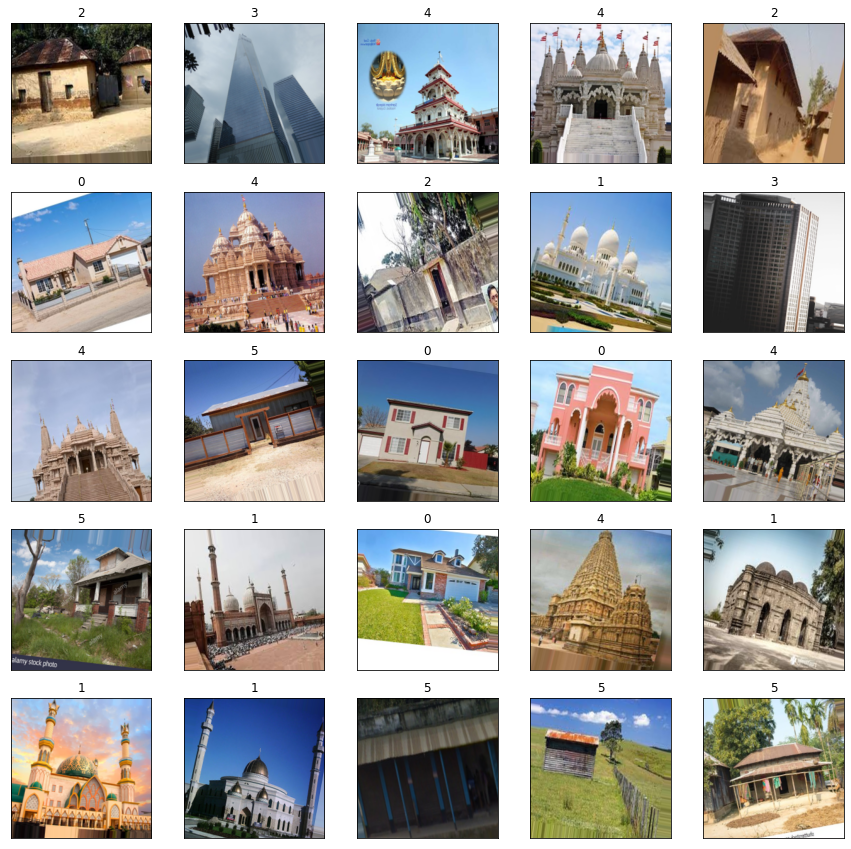

In [ ]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

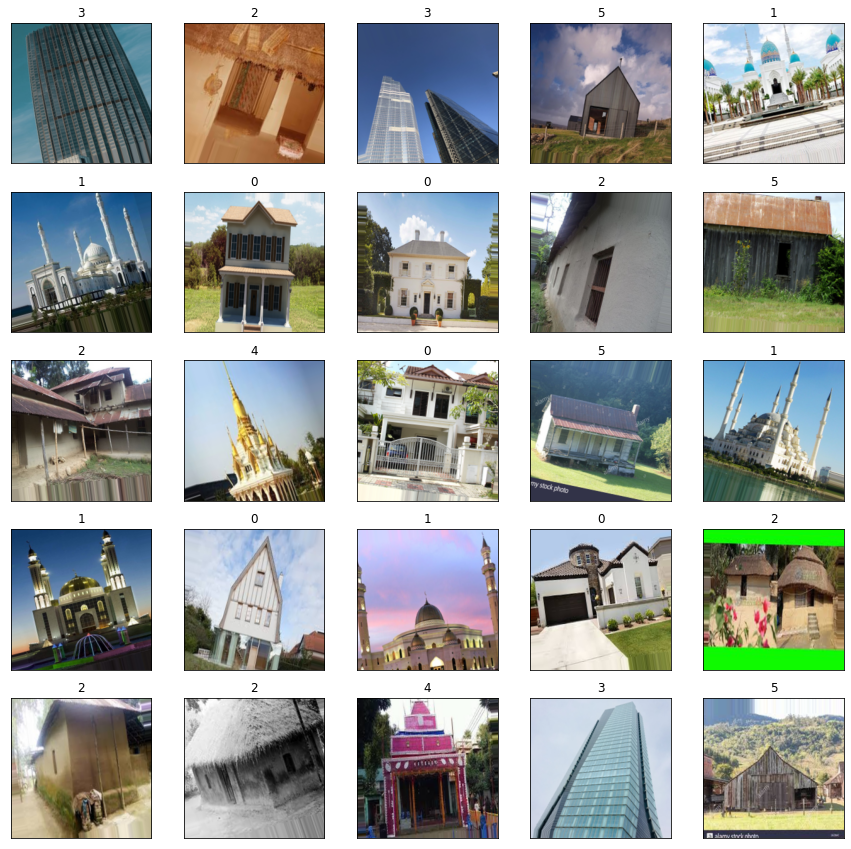

In [ ]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Import ResNet

In [15]:
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras import layers
import tensorflow as tf

In [16]:
base_model=ResNet152V2(input_shape=(224,224,3),include_top=False)

234561536/234545216 [==============================] - 1s 0us/step


In [ ]:
#base_model.summary()

In [17]:
base_model.trainable=False

In [20]:
total_class

6

In [21]:
model = tf.keras.Sequential([
  base_model,
  layers.GlobalAvgPool2D(),
  #layers.Dense(1024,activation='relu'),
  layers.Dense(total_class,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 6)                 12294     
                                                                 
Total params: 58,343,942
Trainable params: 12,294
Non-trainable params: 58,331,648
_________________________________________________________________


In [22]:
base_model.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                        

## Compile the model

In [23]:
model.compile( loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Trained the model

In [24]:
epochs=50
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

960
240
30
7


In [25]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/ResNet.model.best.hdf5', verbose=1 ,save_best_only=True)

In [26]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps,
                    callbacks=[checkpointer])

Epoch 1/50
30/30 [==============================] - ETA: 0s - loss: 0.9668 - accuracy: 0.6427
Epoch 1: val_loss improved from inf to 0.47869, saving model to /content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/ResNet.model.best.hdf5
30/30 [==============================] - 358s 11s/step - loss: 0.9668 - accuracy: 0.6427 - val_loss: 0.4787 - val_accuracy: 0.8304
Epoch 2/50
30/30 [==============================] - ETA: 0s - loss: 0.3688 - accuracy: 0.8844
Epoch 2: val_loss improved from 0.47869 to 0.33324, saving model to /content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/ResNet.model.best.hdf5
30/30 [==============================] - 23s 750ms/step - loss: 0.3688 - accuracy: 0.8844 - val_loss: 0.3332 - val_accuracy: 0.8705
Epoch 3/50
30/30 [==============================] - ETA: 0s - loss: 0.2928 - accuracy: 0.9104
Epoch 3: val_loss improved from 0.33324 to 0.28107, saving model to /content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/ResNet.mode

## Plot Accuracy and Loss Graph

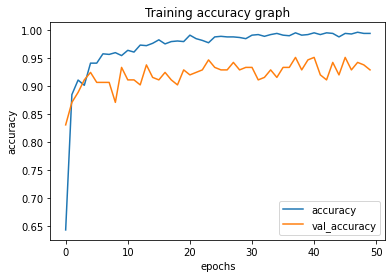

In [27]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

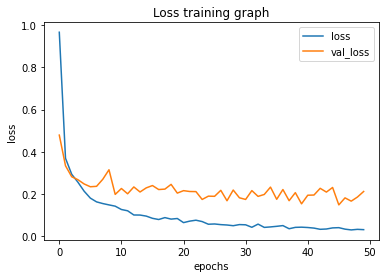

In [28]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Softmax activation fuction

three class labels will be integer encoded as 0, 1, and 2. Then encoded to vectors as follows:

- Class 0: [1, 0, 0]
- Class 1: [0, 1, 0]
- Class 2: [0, 0, 1]

The softmax output might look as follows, which puts the most weight on class 1 and less weight on the other classes.

[0.09003057 0.66524096 0.24472847] -> [0,1,0]

<b>equaltion</b> e^z/sum (e^z1,...,e^zn)

## Adam optimzer

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

## Testing data using test set

In [29]:
test_loss,test_accuracy=model.evaluate(test_dataset)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

10/10 [==============================] - 92s 10s/step - loss: 0.2802 - accuracy: 0.9067
Test Loss:  0.28017881512641907
Test Accuracy:  0.9066666960716248


In [30]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  90.66666960716248


In [31]:
from sklearn.metrics import classification_report

test_pred_raw = model.predict(test_dataset)
test_labels = np.asarray(test_dataset.classes)
test_pred = np.argmax(test_pred_raw, axis=1)

class_names = list(test_dataset.class_indices.keys())
print(classification_report(test_labels, test_pred))
print(test_dataset.class_indices)

              precision    recall  f1-score   support

           0       0.88      0.74      0.80        50
           1       0.94      0.94      0.94        50
           2       0.98      0.92      0.95        50
           3       1.00      1.00      1.00        50
           4       0.96      0.90      0.93        50
           5       0.73      0.94      0.82        50

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300

{'building_house': 0, 'mosque': 1, 'mud_house': 2, 'sky_building': 3, 'temple': 4, 'tinshed': 5}


In [32]:
#True and predicted value calculation
class_labels = list(test_dataset.class_indices.keys())
predictions = []
true        = []
ctr         = 0
for batch, label in test_dataset:
    prediction = model.predict(batch).argmax(axis = -1)
    predictions.extend(prediction)
    true.extend(label.argmax(axis = -1))
    ctr += len(prediction)
    if ctr >= len(test_dataset.labels):
        break

#Defining function for confusion matrix plot 
from sklearn.metrics import confusion_matrix    
matrix  = confusion_matrix(true,predictions)
print(matrix)

[[37  0  0  0  0 13]
 [ 1 47  0  0  2  0]
 [ 0  0 46  0  0  4]
 [ 0  0  0 50  0  0]
 [ 2  3  0  0 45  0]
 [ 2  0  1  0  0 47]]


In [48]:
matrix.ravel()

array([37,  0,  0,  0,  0, 13,  1, 47,  0,  0,  2,  0,  0,  0, 46,  0,  0,
        4,  0,  0,  0, 50,  0,  0,  2,  3,  0,  0, 45,  0,  2,  0,  1,  0,
        0, 47])

In [40]:
print(predictions)

[0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 5, 5, 0, 0, 0, 0, 5, 0, 0, 5, 0, 5, 0, 0, 5, 0, 5, 5, 5, 0, 0, 5, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [41]:
print(true)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


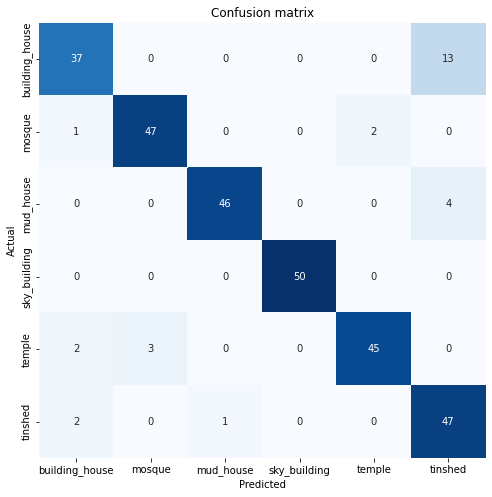

In [33]:
classnames = ['building_house', 'mosque','mud_house', 'sky_building', 'temple', 'tinshed']
import seaborn as sns
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(matrix, cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [49]:
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(true, predictions)))

print('Precision: {:.4f}'.format(precision_score(true, predictions,average='micro')))
print('Recall: {:.4f}'.format(recall_score(true, predictions,average='micro')))
print('F1-score: {:.4f}\n'.format(f1_score(true, predictions,average='micro')))


print('\nClassification Report:\n')
print(classification_report(true, predictions, 
                            target_names = ['building_house', 'mosque','mud_house', 'sky_building', 'temple', 'tinshed']))


Accuracy: 0.9067

Precision: 0.9067
Recall: 0.9067
F1-score: 0.9067


Classification Report:

                precision    recall  f1-score   support

building_house       0.88      0.74      0.80        50
        mosque       0.94      0.94      0.94        50
     mud_house       0.98      0.92      0.95        50
  sky_building       1.00      1.00      1.00        50
        temple       0.96      0.90      0.93        50
       tinshed       0.73      0.94      0.82        50

      accuracy                           0.91       300
     macro avg       0.92      0.91      0.91       300
  weighted avg       0.92      0.91      0.91       300



## Evaluate the model using test image
- class 0: building house
- class 1: mosque
- class 2: temple
- class 4: tinshed

In [ ]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[9.2545855e-01 6.3924286e-05 9.1376230e-03 7.3151517e-04 3.4486354e-04
  7.0340514e-01]]
0


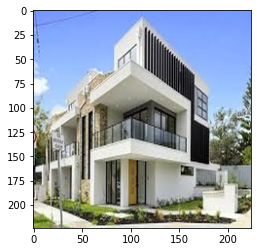

In [ ]:
path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/train/building_house/building_house0.png'
random_image=image.load_img(path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

In [ ]:
images_path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images'
os.listdir(images_path)

['mosque23.png',
 'mosque35.png',
 'building_house1.png',
 'building_house6.png',
 'building_house5.png',
 'mosque1.png',
 'mosque0.png',
 'mosque76.png',
 'temple25.png',
 'temple33.png',
 'temple72.png',
 'sky12.png',
 'sky73.png',
 'sky79.png',
 'tinshed25.png',
 'tinshed113.png',
 'tinshed117.png',
 'mud60.png',
 'mud72.png',
 'mud92.png']

(1, 224, 224, 3)
[[1.3958387e-03 9.9926740e-01 1.5572737e-03 4.1701989e-03 3.9061170e-02
  2.0220694e-04]]
1


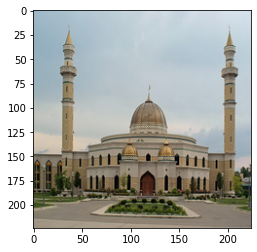

In [ ]:

path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/mosque0.png'
random_image=image.load_img(path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[6.9994210e-05 1.8360662e-04 9.9998116e-01 7.2198270e-07 3.8407892e-02
  1.2286730e-03]]
2


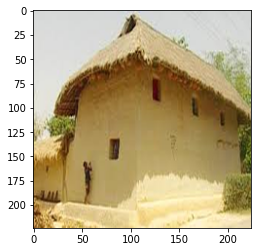

In [ ]:

path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/mud72.png'
random_image=image.load_img(path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[4.4792538e-04 5.2565731e-05 6.9510000e-04 9.9986017e-01 3.4396220e-03
  3.0831277e-04]]
3


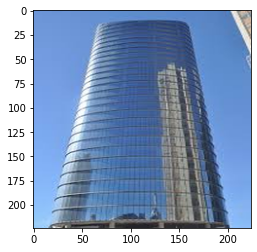

In [ ]:

path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/sky12.png'
random_image=image.load_img(path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.2973911e-06 1.7137831e-03 1.2885426e-06 5.2305620e-07 9.9993849e-01
  2.3304105e-05]]
4


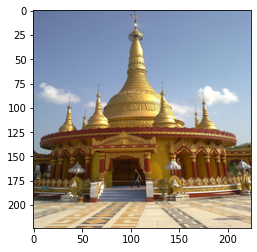

In [ ]:

path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/temple33.png'
random_image=image.load_img(path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.41809464e-01 1.03227554e-04 2.45439276e-01 9.16343051e-05
  4.33828682e-05 9.95369613e-01]]
5


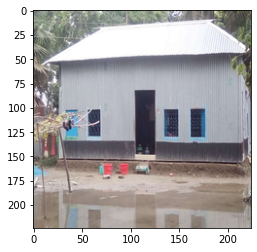

In [ ]:

path='/content/drive/MyDrive/CSE 4000 Thesis/Dataset1500/Images/tinshed117.png'
random_image=image.load_img(path,target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

## Save Model h5 format
This file includes
- Model architecture
- Model weight values during training
- model training config 
- optimizer 

In [ ]:
saved_model='/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/'

In [ ]:
import time
t = time.time()
#export_path_keras = "Saved Model/VGG16_model_{}_time_{}.h5".format(test_accuracy,int(t))
export_path_keras = "/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/ResNet152v2_model_{}_time_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
model.save(export_path_keras)

/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/ResNet152v2_model_0.8700000047683716_time_1619857745.h5


## Reload the model h5 format

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
reload_model=load_model(export_path_keras)
reload_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 12294     
Total params: 58,343,942
Trainable params: 12,294
Non-trainable params: 58,331,648
_________________________________________________________________


## Experiment with reload model h5 format

In [ ]:
print(len(reload_model.weights))
print(reload_model.output_shape)

816
(None, 6)


## Export as SavedModel
 SavedModel is a standalone serialization format for Tensorflow objects, supported by TensorFlow serving as well as TensorFlow implementations other than Python. A SavedModel contains a complete TensorFlow program, including weights and computation. It does not require the original model building code to run, which makes it useful for sharing or deploying (with TFLite, TensorFlow.js, TensorFlow Serving, or TFHub)
- A TensorFlow checkpoint containing the model weights
- Model architecture config

In [ ]:
t = time.time()

export_path_sm = "/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Kera/TL ResNet152v2_{}_model_{}".format(test_accuracy,int(t))
print(export_path_sm)

tf.saved_model.save(model, export_path_sm)

/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Kera/TL ResNet152v2_0.8700000047683716_model_1619857859
INFO:tensorflow:Assets written to: /content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Kera/TL ResNet152v2_0.8700000047683716_model_1619857859/assets


## Load SavedModel

In [ ]:
reload_tf_saved_model=tf.saved_model.load(export_path_sm)

In [ ]:
reload_tf_saved_model.signatures['serving_default']

<ConcreteFunction signature_wrapper(*, resnet152v2_input) at 0x7FD67B982210>

In [ ]:
reload_tf_saved_model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7fd6841e25d0>

## Plot and Check

In [ ]:
train_classes=train_dataset.class_indices
train_classes

In [ ]:
class_names=train_classes.keys()
class_names

In [ ]:
train_classes.values()